In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sma

In [117]:
df = pd.read_csv("train.csv")

In [118]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [119]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [120]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [121]:
df = df.dropna(axis = 1)

In [122]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 62, dtype: int64

In [123]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


<AxesSubplot:>

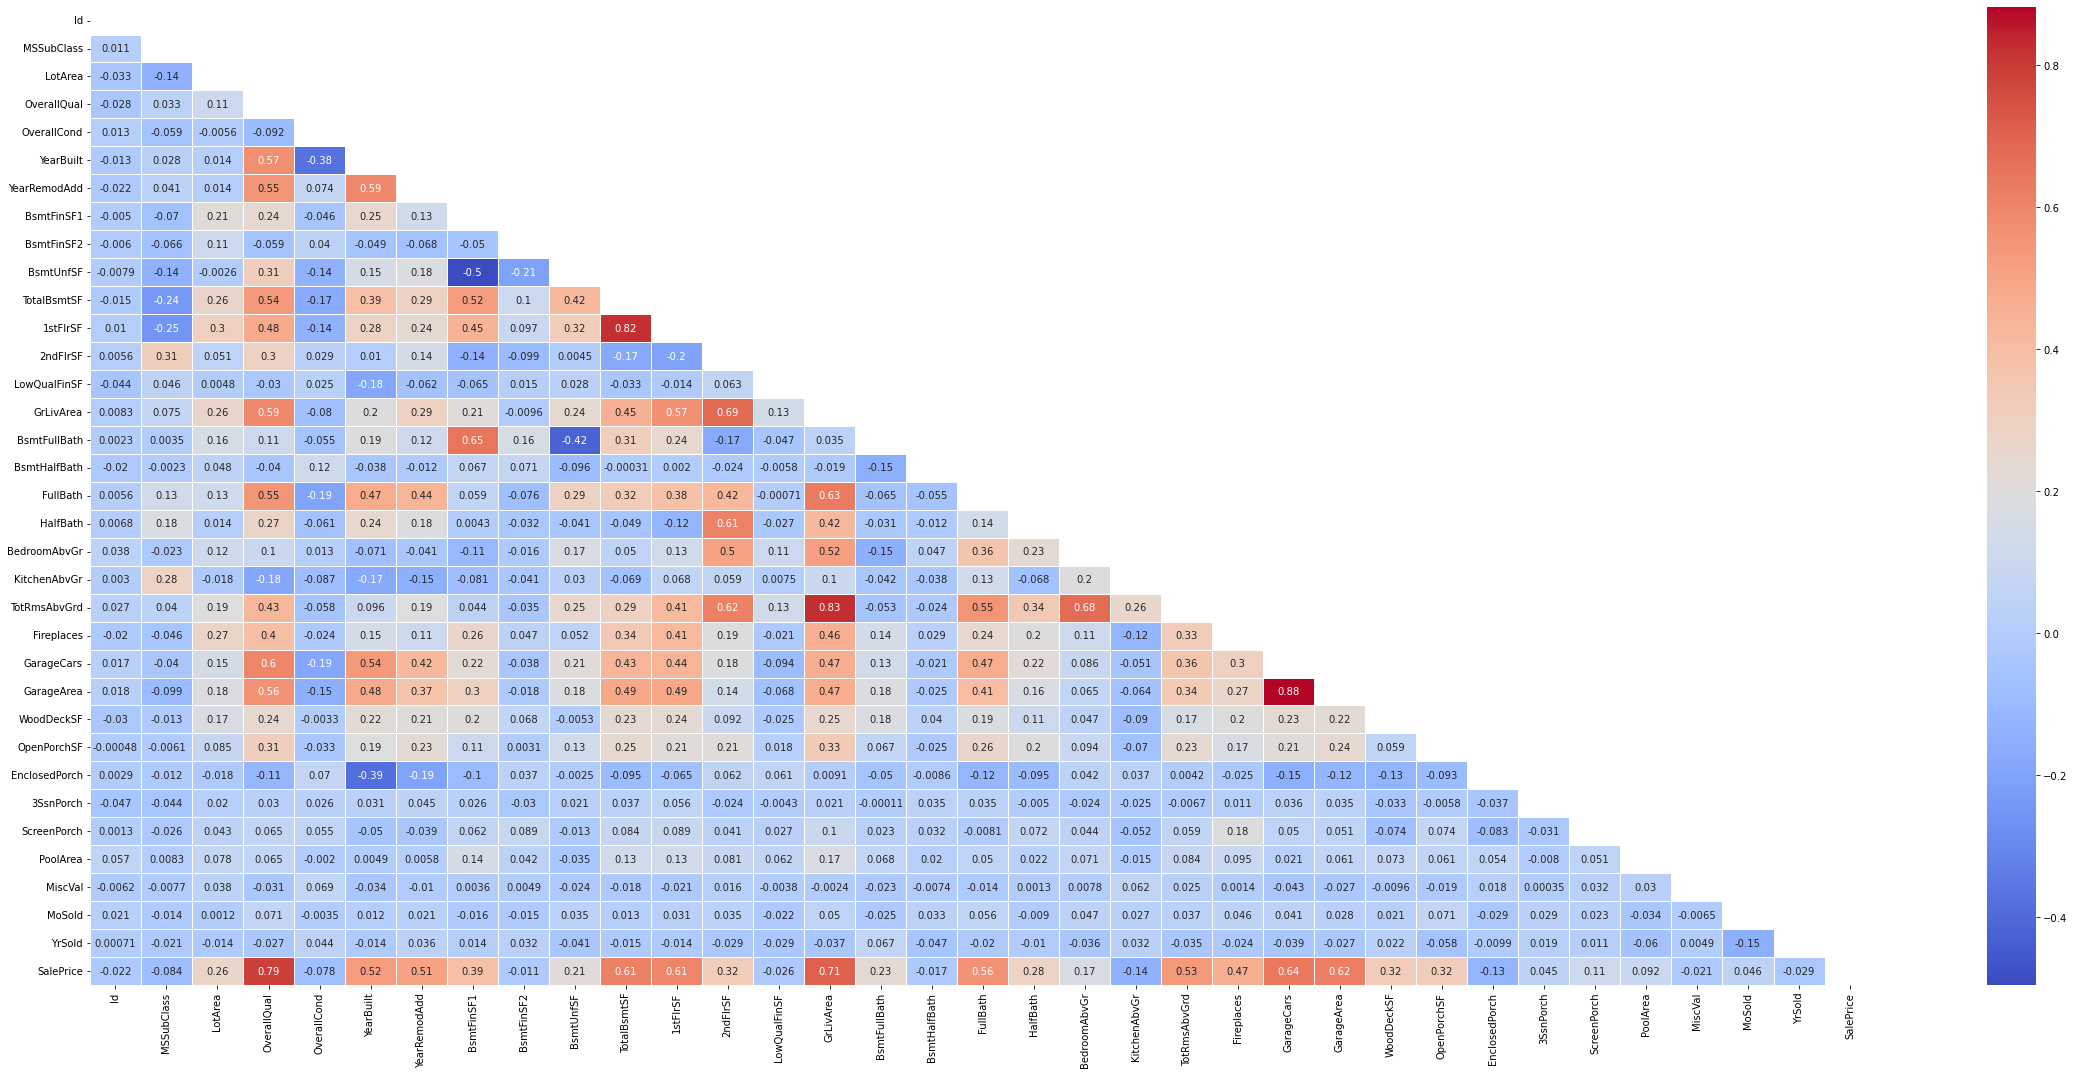

In [124]:
#correlation heat map using pearson method
mask = np.zeros_like(df.corr())
corr = df.corr() 
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize =(40,18))
sns.heatmap(corr,mask = mask, annot=True,cmap='coolwarm', linewidth = .75)


we see 6 variables that have above a .6 correlation:
    OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageCars, GarageArea

<AxesSubplot:>

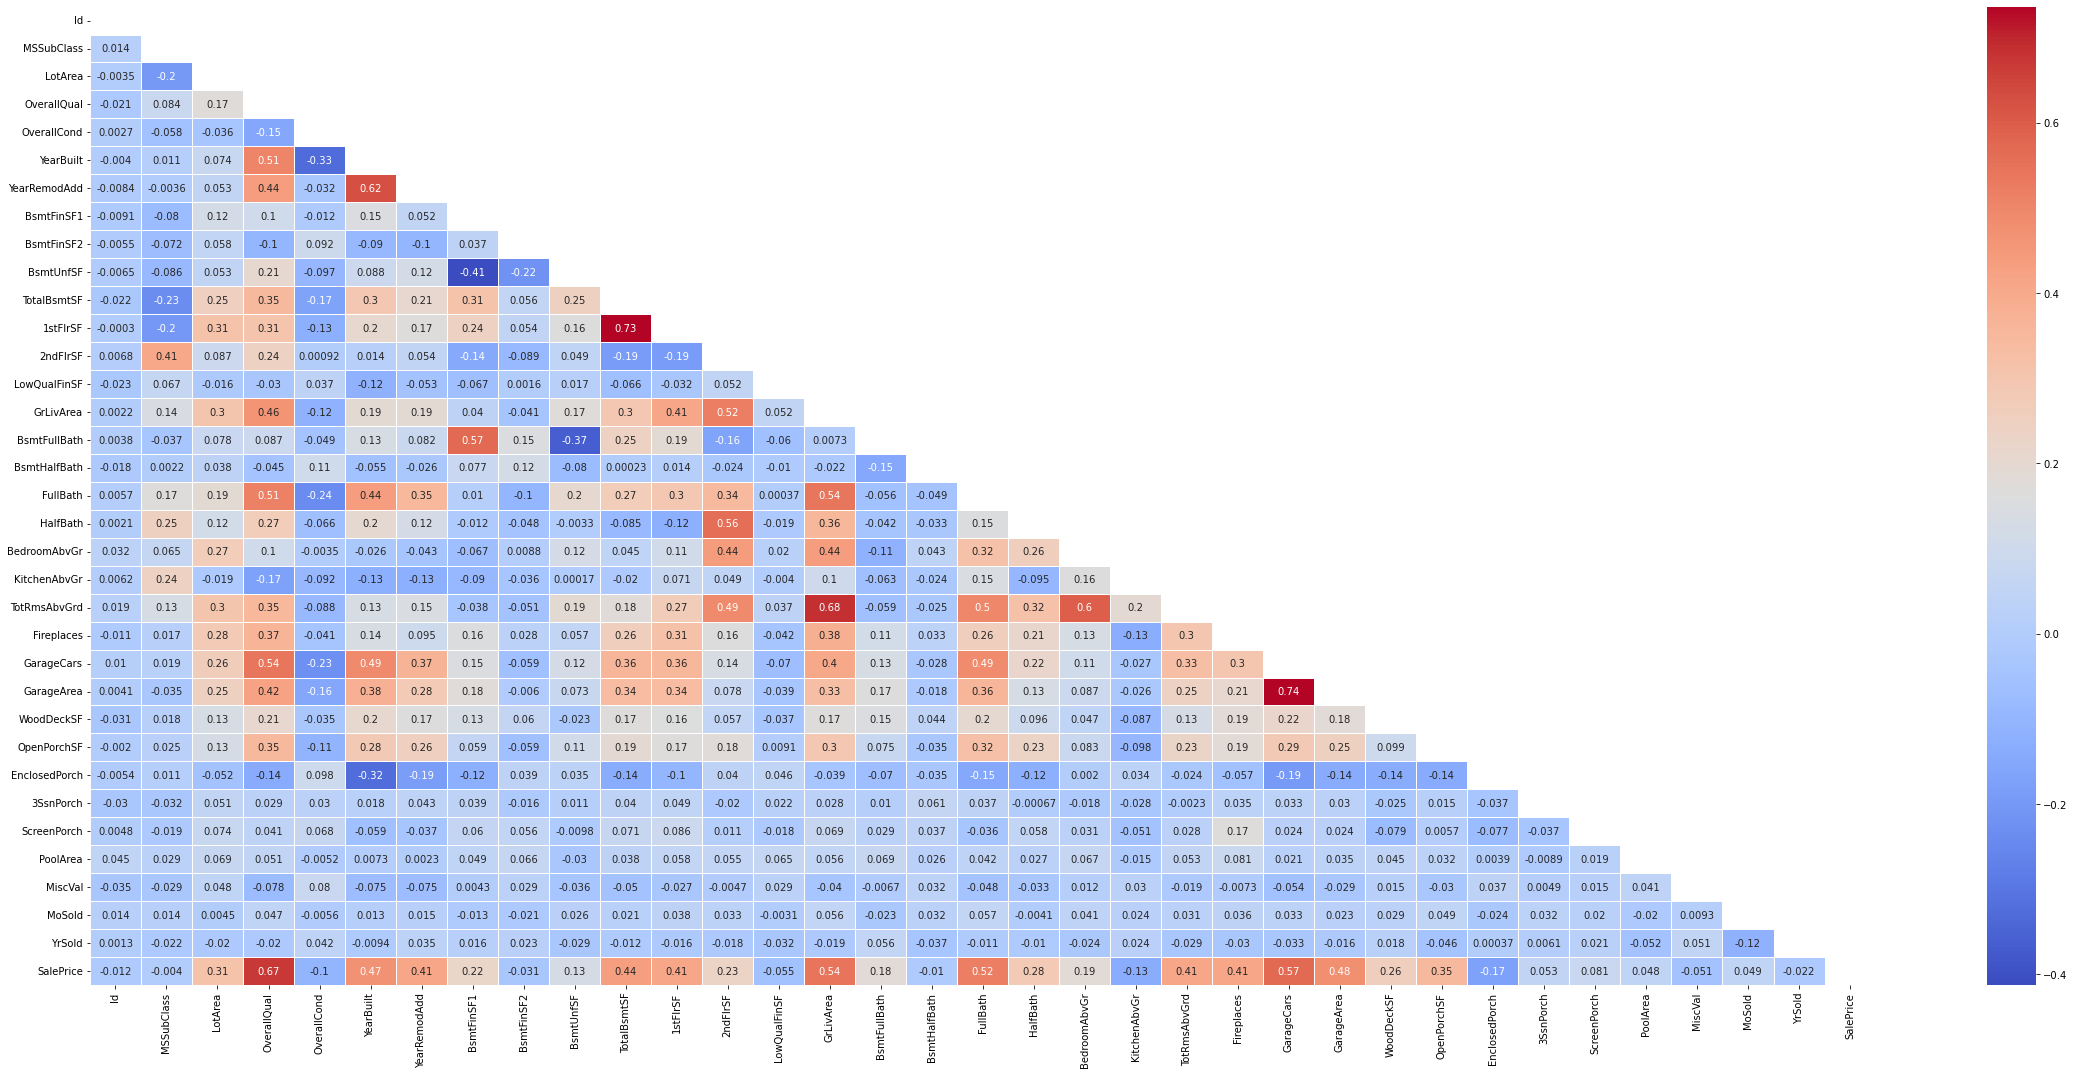

In [125]:
#correlation heat map using kendall method
mask = np.zeros_like(df.corr())
kcorr = df.corr(method = 'kendall') 
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize =(40,18))
sns.heatmap(kcorr,mask = mask, annot=True,cmap='coolwarm', linewidth = .75)

we see 1 variables that have above a .6 correlation:
    OverallQual

<AxesSubplot:>

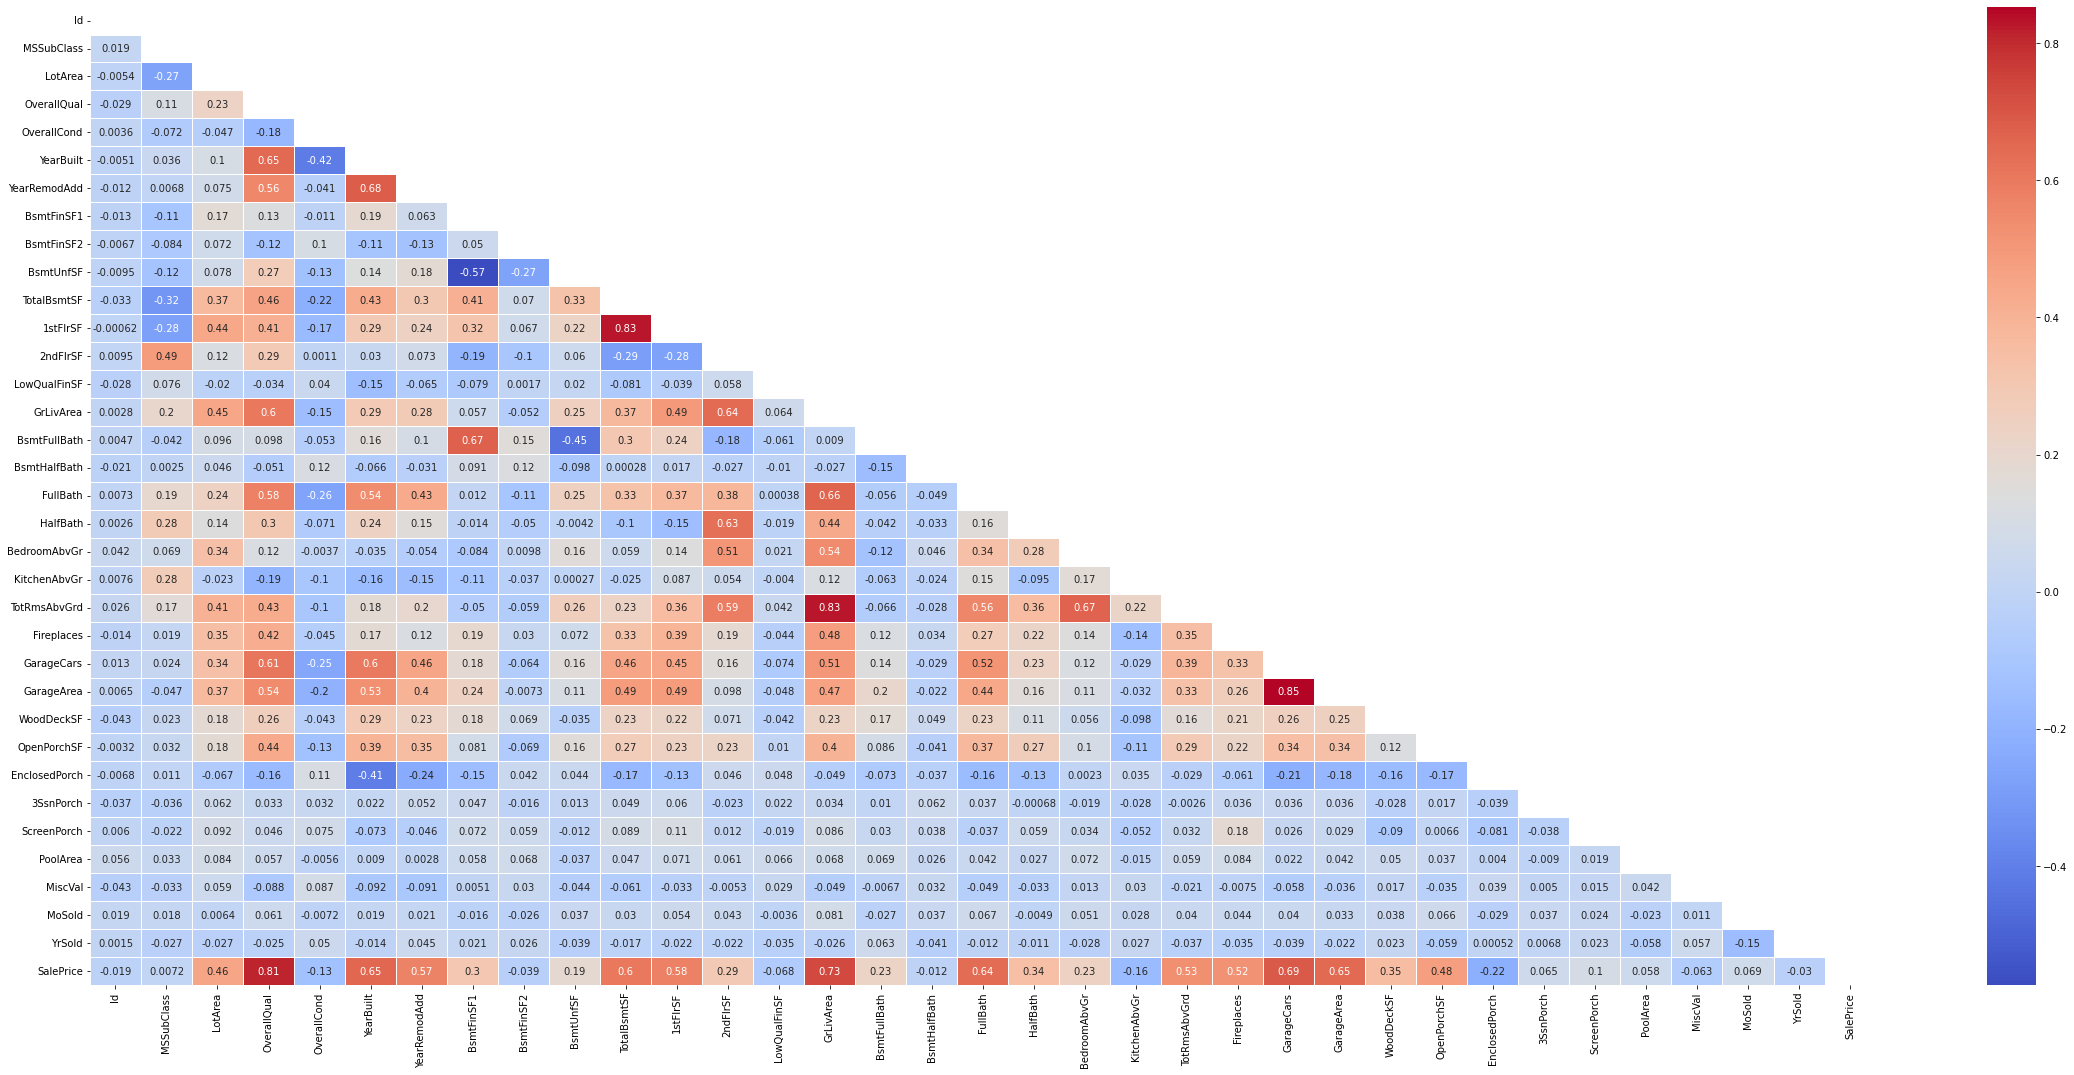

In [126]:
#correlation heat map using spearman method
mask = np.zeros_like(df.corr())
scorr = df.corr('spearman') 
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize =(40,18))
sns.heatmap(scorr,mask = mask, annot=True,cmap='coolwarm', linewidth = .75)

we see 7 variables that have above a .6 correlation:
    OverallQual, YearBuilt, TotalBsmtSF, GrLivArea, FullBath, GarageCars, GarageArea

/Users/bowenyoung/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

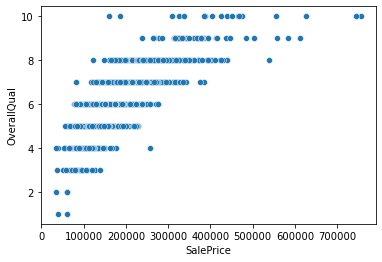

In [127]:
sns.scatterplot(df['SalePrice'], df['OverallQual'])

/Users/bowenyoung/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice', ylabel='YearBuilt'>

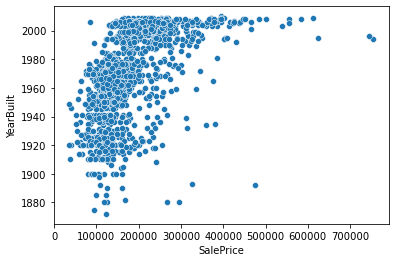

In [128]:
sns.scatterplot(df['SalePrice'], df['YearBuilt'])

/Users/bowenyoung/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice', ylabel='TotalBsmtSF'>

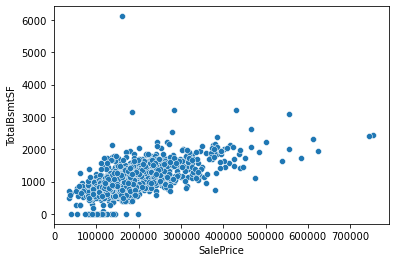

In [129]:
sns.scatterplot(df['SalePrice'], df['TotalBsmtSF'])

/Users/bowenyoung/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

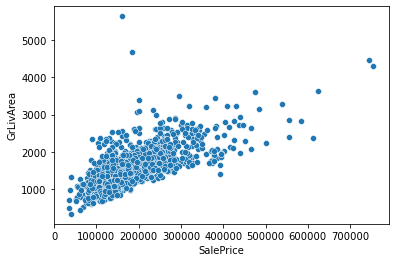

In [130]:
sns.scatterplot(df['SalePrice'], df['GrLivArea'])

/Users/bowenyoung/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice', ylabel='FullBath'>

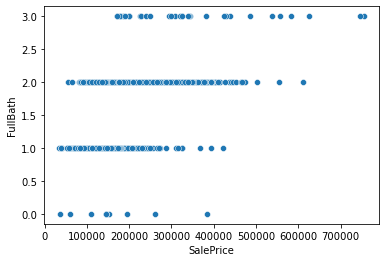

In [131]:
sns.scatterplot(df['SalePrice'], df['FullBath'])

/Users/bowenyoung/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice', ylabel='FullBath'>

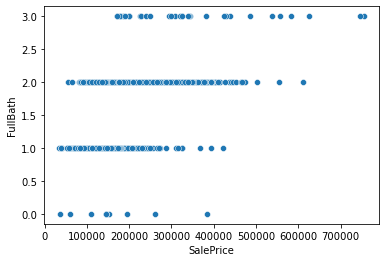

In [132]:
sns.scatterplot(df['SalePrice'], df['FullBath'])

In [133]:
df = pd.get_dummies(df)

In [134]:
X = df.drop(columns = ['SalePrice'])
y = df['SalePrice']

In [135]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler().fit_transform(X)

#put into a df as StandardScaler outputs an array
# scaled doesn't have names for columns, so specify using columns = original dataset.columns
X_scaled = pd.DataFrame(scaled,columns = X.columns)

X_scaled

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730865,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-1.728492,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,-1.726120,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,-1.723747,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,-1.721374,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,-0.174865,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.973018,-0.288653,0.873321,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1456,1.723747,-0.872563,0.266407,-0.071836,0.381743,0.222975,0.151865,0.759659,0.722112,0.049262,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1457,1.726120,0.309859,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.369871,-0.288653,0.701265,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1458,1.728492,-0.872563,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.865548,6.092188,-1.284176,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


## Experiment 1

In [136]:
from sklearn.feature_selection import SelectKBest,f_regression
fs = SelectKBest(score_func=f_regression, k=2)
best = fs.fit_transform(X_scaled,y)

#get all feature names
features = np.array(list(X_scaled.columns))

#get features it deemed best to use
best_features = features[fs.get_support()]
print(best_features)

['OverallQual' 'GrLivArea']


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

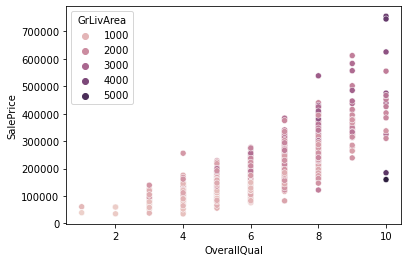

In [137]:
sns.scatterplot(data=df, x='OverallQual', y='SalePrice', hue='GrLivArea')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

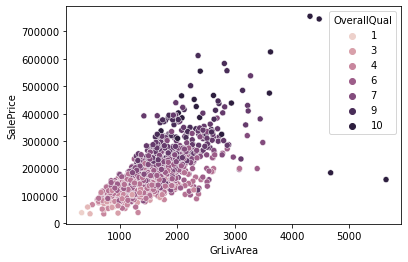

In [138]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', hue='OverallQual')

In [139]:
X_scaled.dtypes

Id                       float64
MSSubClass               float64
LotArea                  float64
OverallQual              float64
OverallCond              float64
                          ...   
SaleCondition_AdjLand    float64
SaleCondition_Alloca     float64
SaleCondition_Family     float64
SaleCondition_Normal     float64
SaleCondition_Partial    float64
Length: 216, dtype: object

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled[best_features], y, test_size = 0.3, random_state = 7)

In [141]:
#get a look at our shape
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1022, 2), (1022,), (438, 2), (438,))

In [142]:
from sklearn import linear_model

# initialize linear regression model
lr = linear_model.LinearRegression()

# fit the model with our X and y
lr_model = lr.fit(X_train, y_train)

In [143]:
## We add a constant to allow OLS to take into account the y-intercept
X2 = sma.add_constant(X_train)

#create OLS model and fit it
est = sma.OLS(y_train, X2)
est2 = est.fit()

#call the summary
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     1173.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):          4.61e-265
Time:                        03:39:04   Log-Likelihood:                -12335.
No. Observations:                1022   AIC:                         2.468e+04
Df Residuals:                    1019   BIC:                         2.469e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.808e+05   1324.609    136.460      

In [144]:
#look at the intercept and slope of the model. 
print('Model Intercept:',lr_model.intercept_)
print('Model Slope:' ,lr_model.coef_[0])

#Get our coefficient of determination
print('Coefficient of Determination:',lr_model.score(X_test, y_test))

#creates table to show the features and their coefficients 
coeff_df = pd.DataFrame(lr_model.coef_, X_test.columns, columns=['Coefficients'])
coeff_df

Model Intercept: 180755.85958491953
Model Slope: 45333.232187714864
Coefficient of Determination: 0.7372803824331986


,Coefficients
OverallQual,45333.232188
GrLivArea,25095.603634


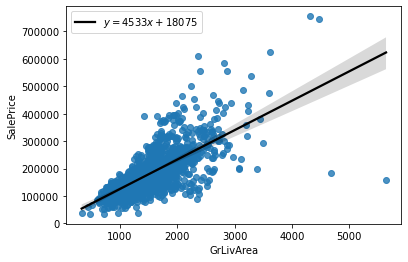

In [145]:
import matplotlib.pyplot as plt

#line_kws lets us change up some things about the line in the plot. Change the color here so you can see it against the points, but also where you can put your slope formula
#the '$y=%3.7s*x+%3.7s$'is what will format the coefficient and intercept as the line function y=mx + b
# more info on using % to format here: https://docs.python.org/3/library/stdtypes.html#str.format
# or here: https://www.geeksforgeeks.org/string-formatting-in-python/
plot_rnet = sns.regplot(data = df,x="GrLivArea", y="SalePrice",line_kws={'color':'black',
                                                                           'label':'$y=%5.4sx+%5.5s$'%(lr_model.coef_[0],lr_model.intercept_)})
plt.legend()


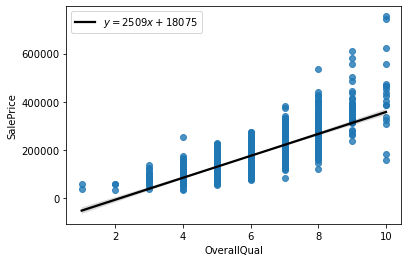

In [146]:
plot_rnet = sns.regplot(data = df,x="OverallQual", y="SalePrice",line_kws={'color':'black',
                                                                           'label':'$y=%5.4sx+%5.5s$'%(lr_model.coef_[1],lr_model.intercept_)})
plt.legend()

In [147]:
y_pred = lr_model.predict(X_test)

In [148]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred,squared = False)

print('Mean Absolute Error:', round(mae,2))
print('Mean Square Error:', round(mse,2))
print('Root Mean Square Error:', round(rmse,2))

Mean Absolute Error: 29344.99
Mean Square Error: 1910532686.76
Root Mean Square Error: 43709.64


## Experiment 2

In [149]:
x = X_scaled[['GrLivArea']]

In [150]:
y = df['SalePrice']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 7)

In [152]:
from sklearn.linear_model import LinearRegression
sl = LinearRegression()
sl.fit(X_train, y_train)

prediction = sl.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse_sl = mean_squared_error(prediction, y_test, squared = False)
mae_sl = metrics.mean_absolute_error(y_test, y_pred)
mse_sl = metrics.mean_squared_error(y_test, y_pred)
print('MAE SLR: ', round(mae_sl, 2))
print('MSE SLR: ', round(mse_sl, 2))
print('RMSE SLR: ', round(rmse_sl, 2))

MAE SLR:  29344.99
MSE SLR:  1910532686.76
RMSE SLR:  57057.59


## Experiment 3

In [153]:
x = X_scaled[['TotalBsmtSF','OverallQual','YearBuilt','1stFlrSF','GrLivArea','TotRmsAbvGrd',"GarageCars", "GarageArea"]]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 10)
                                                      

ml = LinearRegression()
ml.fit(X_train, y_train)
prediction1 = ml.predict(X_test)
mae_m = metrics.mean_absolute_error(y_test, y_pred)
mse_m = metrics.mean_squared_error(y_test, y_pred)
rmse_m = mean_squared_error(prediction1, y_test, squared = False)
print('MAE MLR: ', round(mae_m, 2))
print('MSE MLR: ', round(mse_m, 2))
print('RMSE MLR: ', round(rmse_m, 2))

MAE MLR:  77821.66
MSE MLR:  10225847788.29
RMSE MLR:  34998.95


## Compare Experiments

In [156]:
#create data
data = [["MAE",round(mae, 2),round(mae_sl, 2),round(mae_m,2)], 
        ["MSE",round(mse, 2),round(mse_sl, 2),round(mse_m,2)], 
       ["RMSE",round(rmse,2),round(rmse_sl, 2),round(rmse_m, 2)]]
  
#define header names
col_names = ["Error type", "Best Feature","Single Reg","Multiple Reg",]
  
#display table
from tabulate import tabulate
print(tabulate(data, headers=col_names))

Error type       Best Feature       Single Reg     Multiple Reg
------------  ---------------  ---------------  ---------------
MAE           29345            29345            77821.7
MSE               1.91053e+09      1.91053e+09      1.02258e+10
RMSE          43709.6          57057.6          34998.9
